# Heart Disease Prediction

**Objective**: Build and compare multiple ML models to predict heart disease based on patient health metrics

**Dataset**: UCI Heart Disease Dataset

**Project Structure**:
1. Data Cleaning
2. Feature Engineering
3. Exploratory Data Analysis (EDA)
4. Model Training & Comparison
5. Evaluation & Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Loading & Initial Exploration

In [2]:
# Load the dataset from local CSV file
import os

# Construct the path to heart.csv in the same directory
csv_path = os.path.join(os.getcwd(), 'heart.csv')

# Try loading from local file first
try:
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        print(f"✓ Loaded dataset from: {csv_path}")
    else:
        # Try alternate path
        alt_path = r'c:\Users\ASUS\OneDrive\Desktop\ML LAB\heart.csv'
        df = pd.read_csv(alt_path)
        print(f"✓ Loaded dataset from: {alt_path}")
except Exception as e:
    print(f"Error loading file: {e}")
    df = pd.DataFrame()

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

✓ Loaded dataset from: /content/heart.csv
Dataset Shape: (1025, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 

## 2. Data Cleaning

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

# Remove duplicates
print("\nDuplicate rows before cleaning:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after cleaning:", df.duplicated().sum())

# Handle missing values (if any)
# Drop rows with missing values or fill with median/mean
if df.isnull().sum().sum() > 0:
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)

    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nData after cleaning:")
print(df.info())
print("\nDataset shape after cleaning:", df.shape)

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing Values Percentage:
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

Duplicate rows before cleaning: 723
Duplicate rows after cleaning: 0

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6  

## 3. Exploratory Data Analysis (EDA)

Target Variable Distribution:
target
1    164
0    138
Name: count, dtype: int64

Target Variable Percentage:
target
1    54.304636
0    45.695364
Name: proportion, dtype: float64


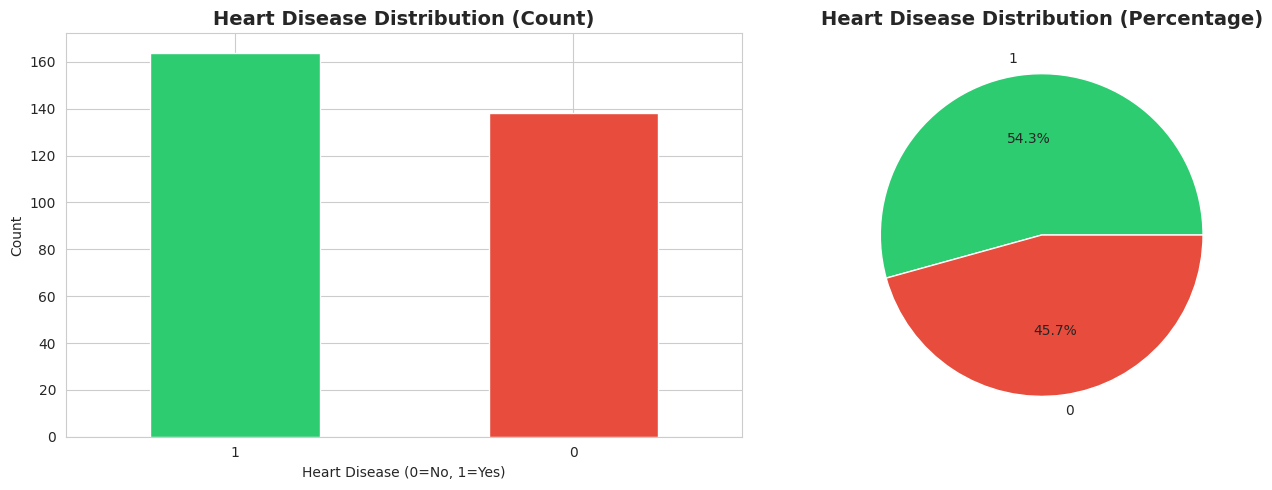


Class Balance: Dataset is Balanced


In [4]:
# Target variable analysis
print("Target Variable Distribution:")
target_col = df.columns[-1]  # Assuming last column is target
print(df[target_col].value_counts())
print("\nTarget Variable Percentage:")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Heart Disease Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Pie chart
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Heart Disease Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\nClass Balance: Dataset is", "Balanced" if abs(df[target_col].value_counts()[0] - df[target_col].value_counts()[1]) < len(df) * 0.2 else "Imbalanced")

Numerical Features: 13
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


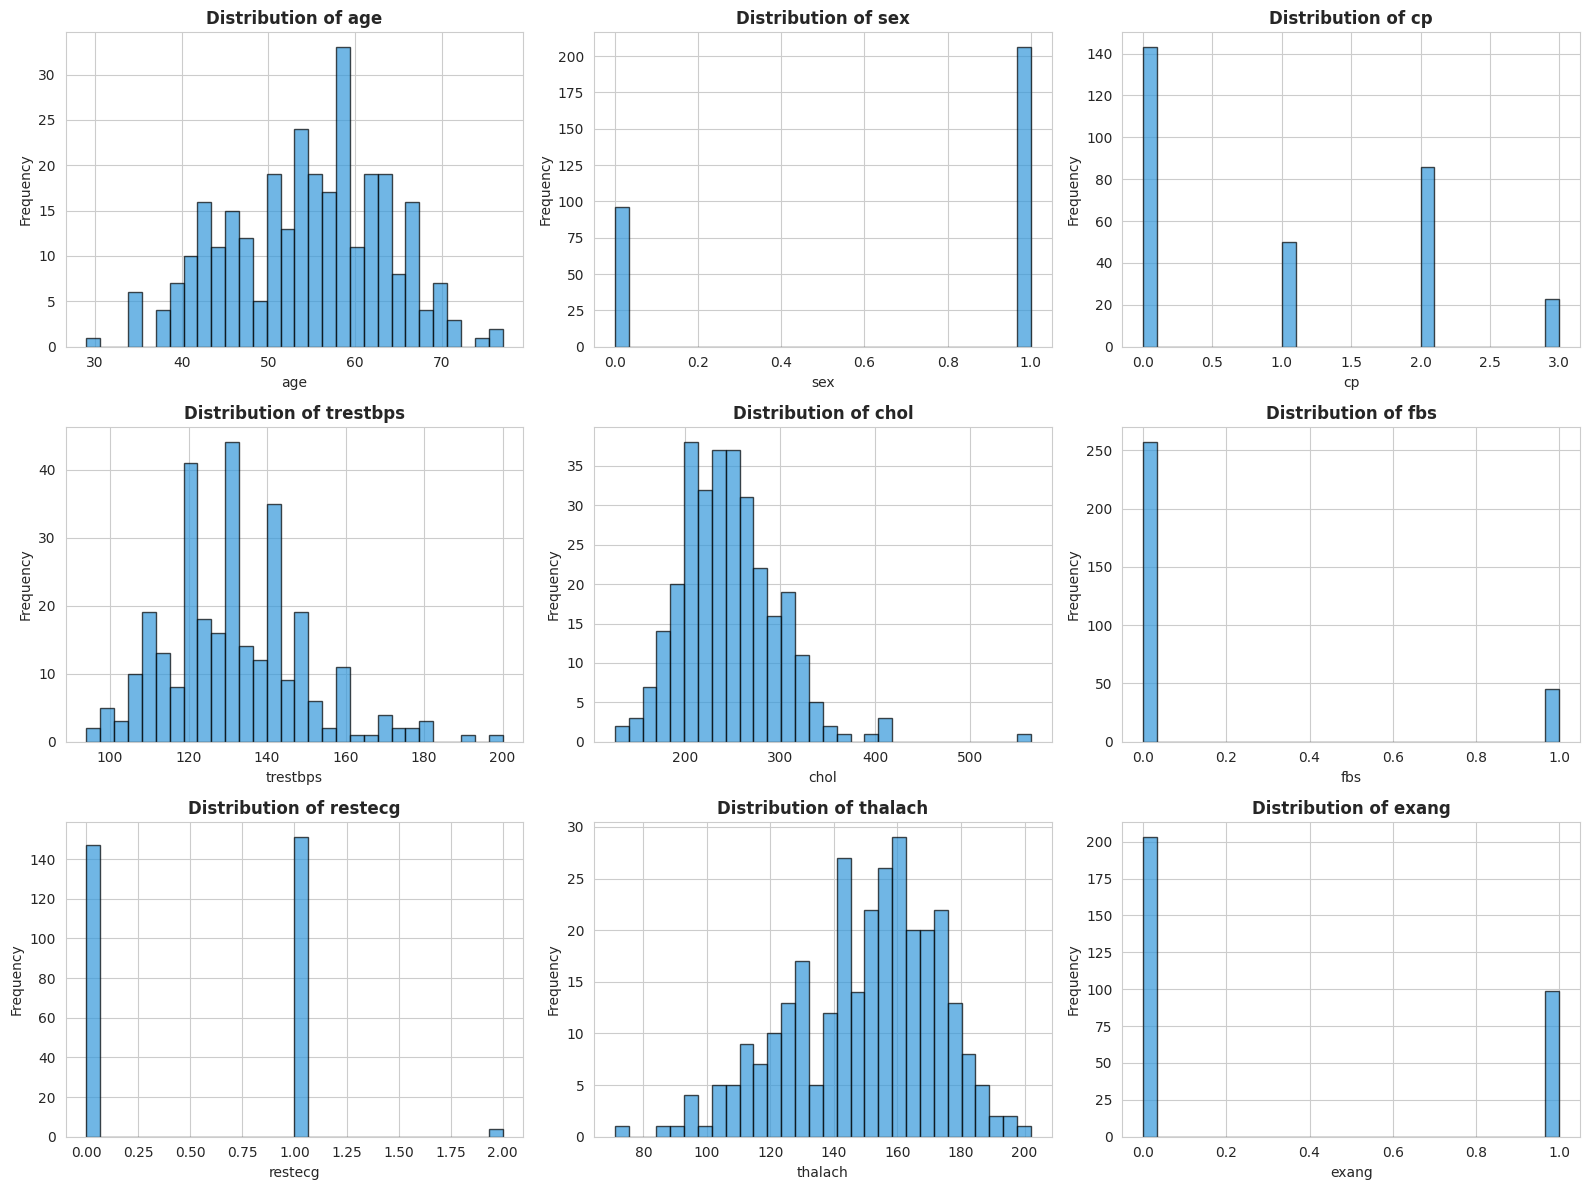


Numerical Features Statistics:
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std 

In [5]:
# Numerical columns analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"Numerical Features: {len(numerical_cols)}")
print(numerical_cols)

# Distribution of numerical features
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:9]):  # Show first 9 features
    axes[idx].hist(df[col], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\nNumerical Features Statistics:")
print(df[numerical_cols].describe())

Correlation with Target Variable:
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


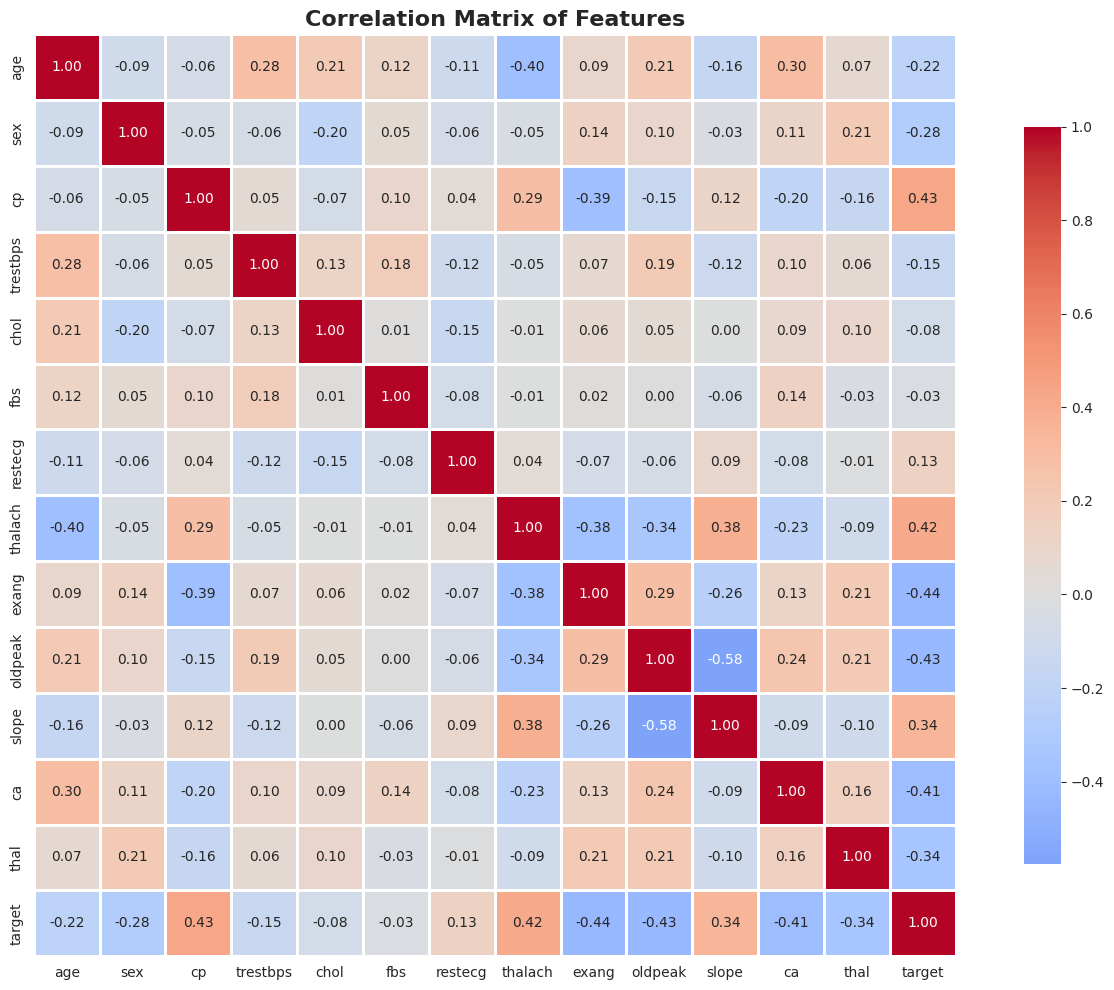

In [6]:
# Correlation Analysis
print("Correlation with Target Variable:")
correlation_with_target = df[numerical_cols + [target_col]].corr()[target_col].sort_values(ascending=False)
print(correlation_with_target)

# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols + [target_col]].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

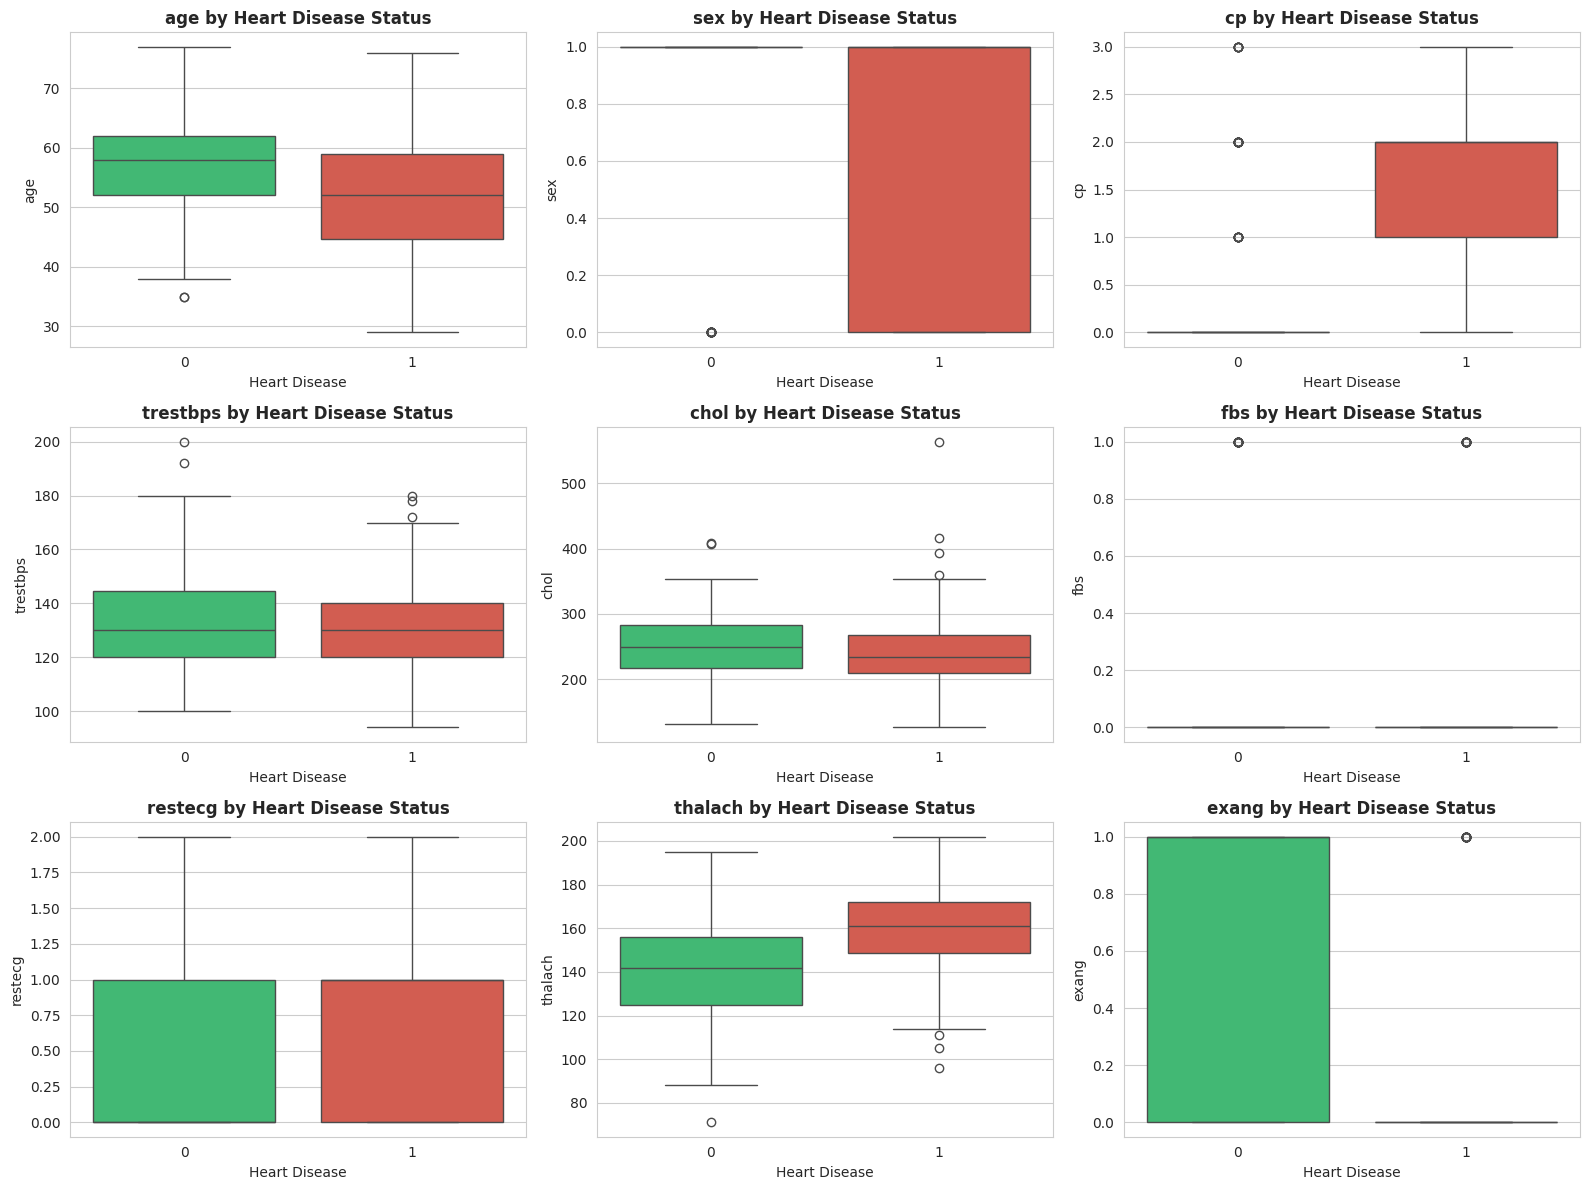

In [7]:
# Box plots for target variable comparison
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:9]):
    sns.boxplot(x=target_col, y=col, data=df, ax=axes[idx], palette=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} by Heart Disease Status', fontweight='bold')
    axes[idx].set_xlabel('Heart Disease')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

## 4. Feature Engineering

In [8]:
# Prepare data for modeling
X = df.drop(columns=[target_col])
y = df[target_col]

# Separate features and target
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Standardization (Feature Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeature Scaling Applied!")
print("Scaled Features - First 5 rows:")
print(X_scaled.head())
print("\nScaled Features Statistics:")
print(X_scaled.describe())

Feature matrix shape: (302, 13)
Target vector shape: (302,)

Feature Scaling Applied!
Scaled Features - First 5 rows:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.267966  0.682656 -0.935208 -0.376556 -0.667728 -0.418446  0.901657   
1 -0.157260  0.682656 -0.935208  0.478910 -0.841918  2.389793 -1.002541   
2  1.724733  0.682656 -0.935208  0.764066 -1.403197 -0.418446  0.901657   
3  0.728383  0.682656 -0.935208  0.935159 -0.841918 -0.418446  0.901657   
4  0.839089 -1.464866 -0.935208  0.364848  0.919336  2.389793  0.901657   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.806035 -0.698344 -0.037124  0.979514  1.274980  1.119967  
1  0.237495  1.431958  1.773958 -2.271182 -0.714911  1.119967  
2 -1.074521  1.431958  1.342748 -2.271182 -0.714911  1.119967  
3  0.499898 -0.698344 -0.899544  0.979514  0.280034  1.119967  
4 -1.905464 -0.698344  0.739054 -0.645834  2.269926 -0.513994  

Scaled Features Statistics:
                ag

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nTesting set target distribution:")
print(y_test.value_counts())

Training set size: (241, 13)
Testing set size: (61, 13)

Training set target distribution:
target
1    131
0    110
Name: count, dtype: int64

Testing set target distribution:
target
1    33
0    28
Name: count, dtype: int64


## 5. Model Training & Comparison

In [10]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, verbosity=0)
}

# Store results
results = {}

# Train and evaluate each model
print("=" * 80)
print("MODEL TRAINING & EVALUATION")
print("=" * 80)

for model_name, model in models.items():
    print(f"\n{model_name}:")
    print("-" * 40)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Get probability predictions for ROC-AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[model_name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred_test,
        'y_pred_proba': y_pred_proba
    }

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred_test, target_names=['No Disease', 'Disease']))

MODEL TRAINING & EVALUATION

Logistic Regression:
----------------------------------------
Training Accuracy: 0.8589
Testing Accuracy: 0.8033
Precision: 0.8000
Recall: 0.8485
F1-Score: 0.8235
ROC-AUC Score: 0.8712

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.81      0.75      0.78        28
     Disease       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Random Forest:
----------------------------------------
Training Accuracy: 1.0000
Testing Accuracy: 0.7541
Precision: 0.7647
Recall: 0.7879
F1-Score: 0.7761
ROC-AUC Score: 0.8626

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.74      0.71      0.73        28
     Disease       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg 

## 6. Model Evaluation & Visualization

In [11]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[m]['train_accuracy'] for m in results.keys()],
    'Test Accuracy': [results[m]['test_accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

print("\n" + "=" * 100)
print("MODEL COMPARISON SUMMARY")
print("=" * 100)
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {comparison_df.loc[comparison_df['Model'] == best_model_name, 'Test Accuracy'].values[0]:.4f}")
print(f"ROC-AUC Score: {comparison_df.loc[comparison_df['Model'] == best_model_name, 'ROC-AUC'].values[0]:.4f}")


MODEL COMPARISON SUMMARY
                 Model  Train Accuracy  Test Accuracy  Precision   Recall  F1-Score  ROC-AUC
   Logistic Regression        0.858921       0.803279   0.800000 0.848485  0.823529 0.871212
         Random Forest        1.000000       0.754098   0.764706 0.787879  0.776119 0.862554
Support Vector Machine        0.921162       0.770492   0.771429 0.818182  0.794118 0.845238
               XGBoost        1.000000       0.721311   0.735294 0.757576  0.746269 0.832251

🏆 BEST MODEL: Logistic Regression
Test Accuracy: 0.8033
ROC-AUC Score: 0.8712


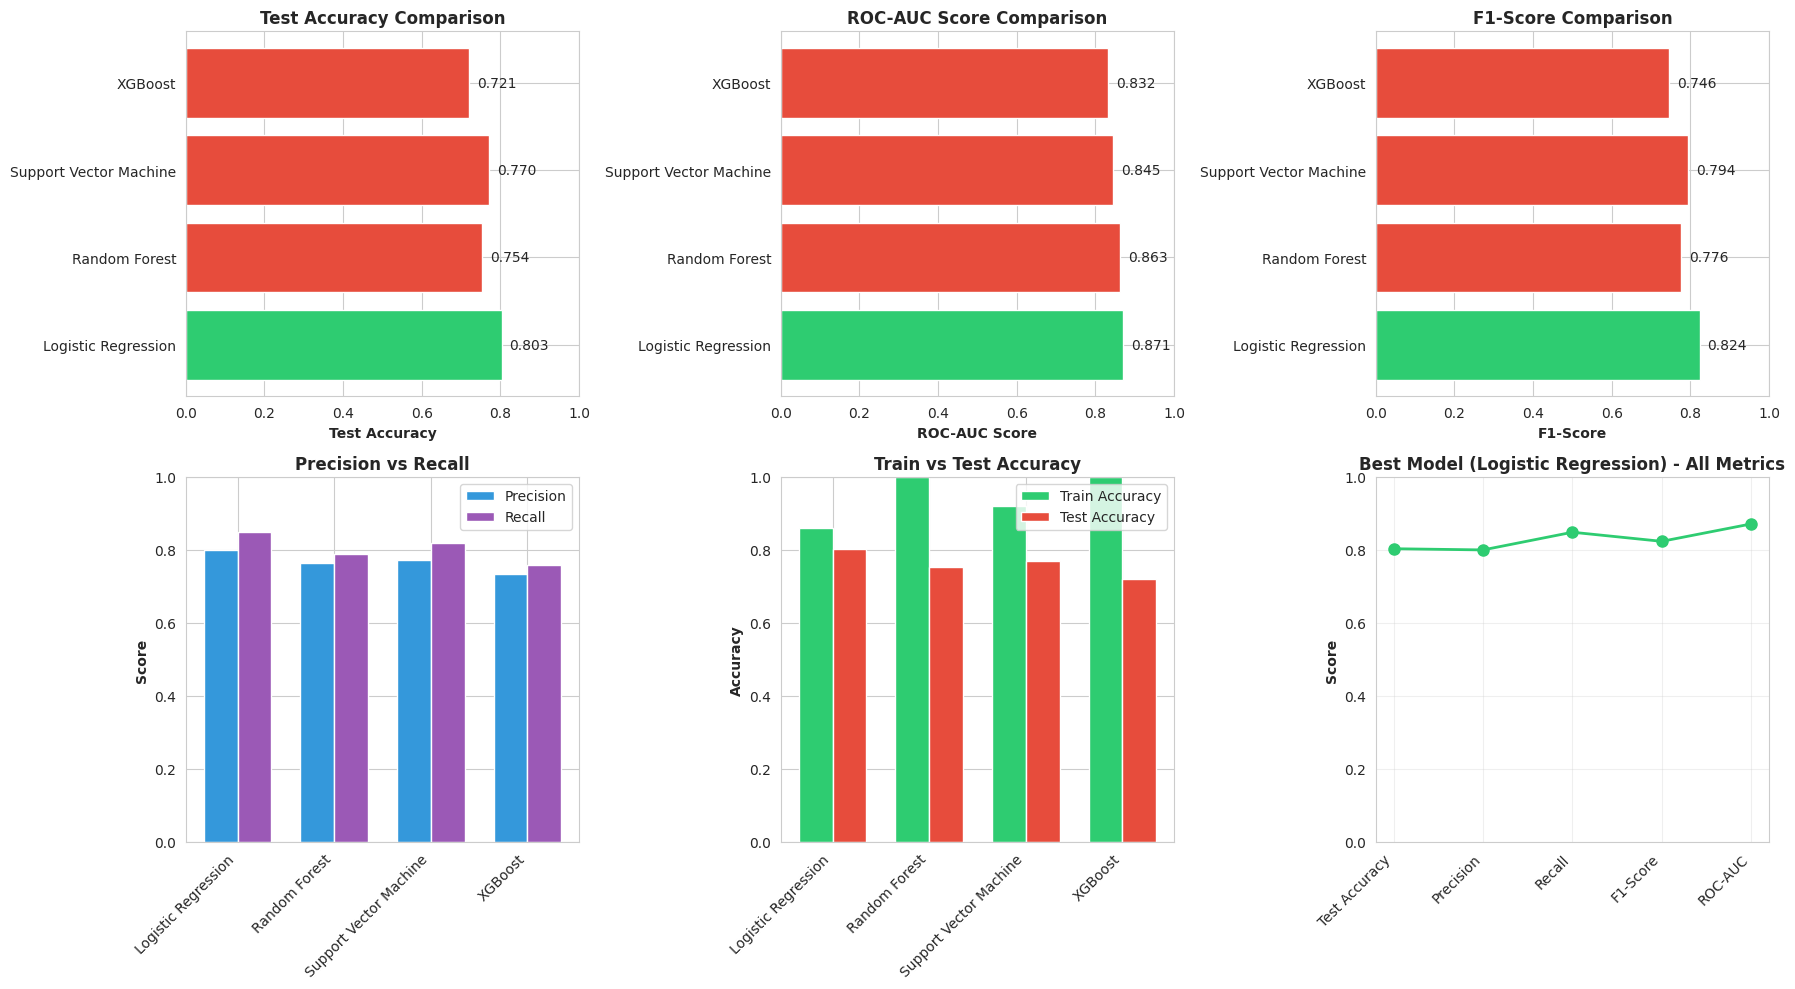

In [12]:
# Visualize accuracy comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Test Accuracy Comparison
ax = axes[0, 0]
models_list = comparison_df['Model'].tolist()
colors = ['#e74c3c' if x != best_model_name else '#2ecc71' for x in models_list]
ax.barh(models_list, comparison_df['Test Accuracy'], color=colors)
ax.set_xlabel('Test Accuracy', fontweight='bold')
ax.set_title('Test Accuracy Comparison', fontweight='bold', fontsize=12)
ax.set_xlim([0, 1])
for i, v in enumerate(comparison_df['Test Accuracy']):
    ax.text(v + 0.02, i, f'{v:.3f}', va='center')

# 2. ROC-AUC Comparison
ax = axes[0, 1]
colors = ['#e74c3c' if x != best_model_name else '#2ecc71' for x in models_list]
ax.barh(models_list, comparison_df['ROC-AUC'], color=colors)
ax.set_xlabel('ROC-AUC Score', fontweight='bold')
ax.set_title('ROC-AUC Score Comparison', fontweight='bold', fontsize=12)
ax.set_xlim([0, 1])
for i, v in enumerate(comparison_df['ROC-AUC']):
    ax.text(v + 0.02, i, f'{v:.3f}', va='center')

# 3. F1-Score Comparison
ax = axes[0, 2]
colors = ['#e74c3c' if x != best_model_name else '#2ecc71' for x in models_list]
ax.barh(models_list, comparison_df['F1-Score'], color=colors)
ax.set_xlabel('F1-Score', fontweight='bold')
ax.set_title('F1-Score Comparison', fontweight='bold', fontsize=12)
ax.set_xlim([0, 1])
for i, v in enumerate(comparison_df['F1-Score']):
    ax.text(v + 0.02, i, f'{v:.3f}', va='center')

# 4. Precision vs Recall
ax = axes[1, 0]
x = np.arange(len(models_list))
width = 0.35
ax.bar(x - width/2, comparison_df['Precision'], width, label='Precision', color='#3498db')
ax.bar(x + width/2, comparison_df['Recall'], width, label='Recall', color='#9b59b6')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Precision vs Recall', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha='right')
ax.legend()
ax.set_ylim([0, 1])

# 5. Train vs Test Accuracy
ax = axes[1, 1]
x = np.arange(len(models_list))
width = 0.35
ax.bar(x - width/2, comparison_df['Train Accuracy'], width, label='Train Accuracy', color='#2ecc71')
ax.bar(x + width/2, comparison_df['Test Accuracy'], width, label='Test Accuracy', color='#e74c3c')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Train vs Test Accuracy', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha='right')
ax.legend()
ax.set_ylim([0, 1])

# 6. All Metrics Radar (Normalized)
ax = axes[1, 2]
metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
best_model_data = comparison_df[comparison_df['Model'] == best_model_name][metrics].values[0]
x_pos = np.arange(len(metrics))
ax.plot(x_pos, best_model_data, marker='o', linewidth=2, markersize=8, color='#2ecc71', label=best_model_name)
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title(f'Best Model ({best_model_name}) - All Metrics', fontweight='bold', fontsize=12)
ax.set_ylim([0, 1])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

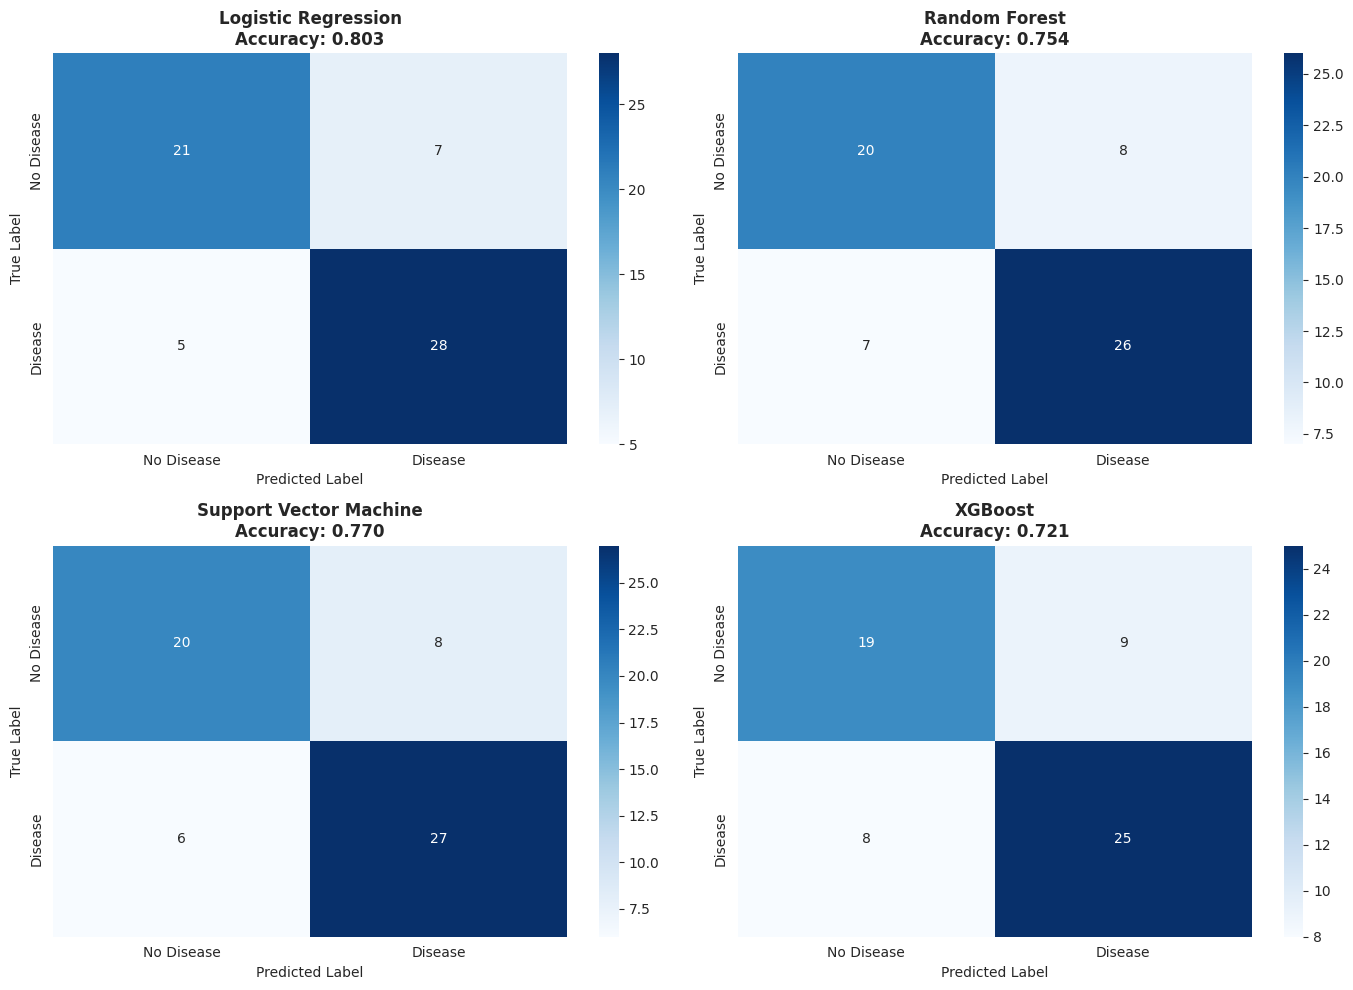

In [13]:
# Confusion Matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'],
                cbar=True)
    axes[idx].set_title(f'{model_name}\nAccuracy: {result["test_accuracy"]:.3f}', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

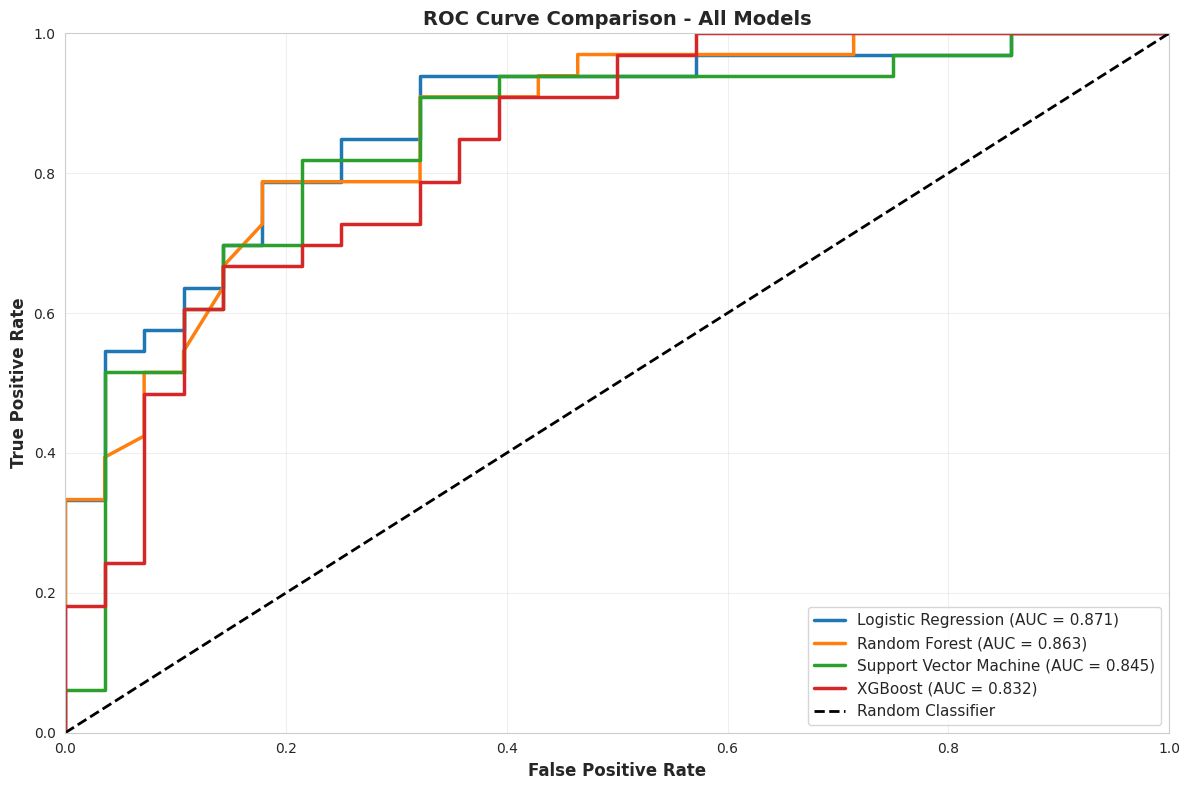

In [14]:
# ROC Curves for all models
plt.figure(figsize=(12, 8))

for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    roc_auc = result['roc_auc']
    plt.plot(fpr, tpr, linewidth=2.5, label=f'{model_name} (AUC = {roc_auc:.3f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curve Comparison - All Models', fontweight='bold', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

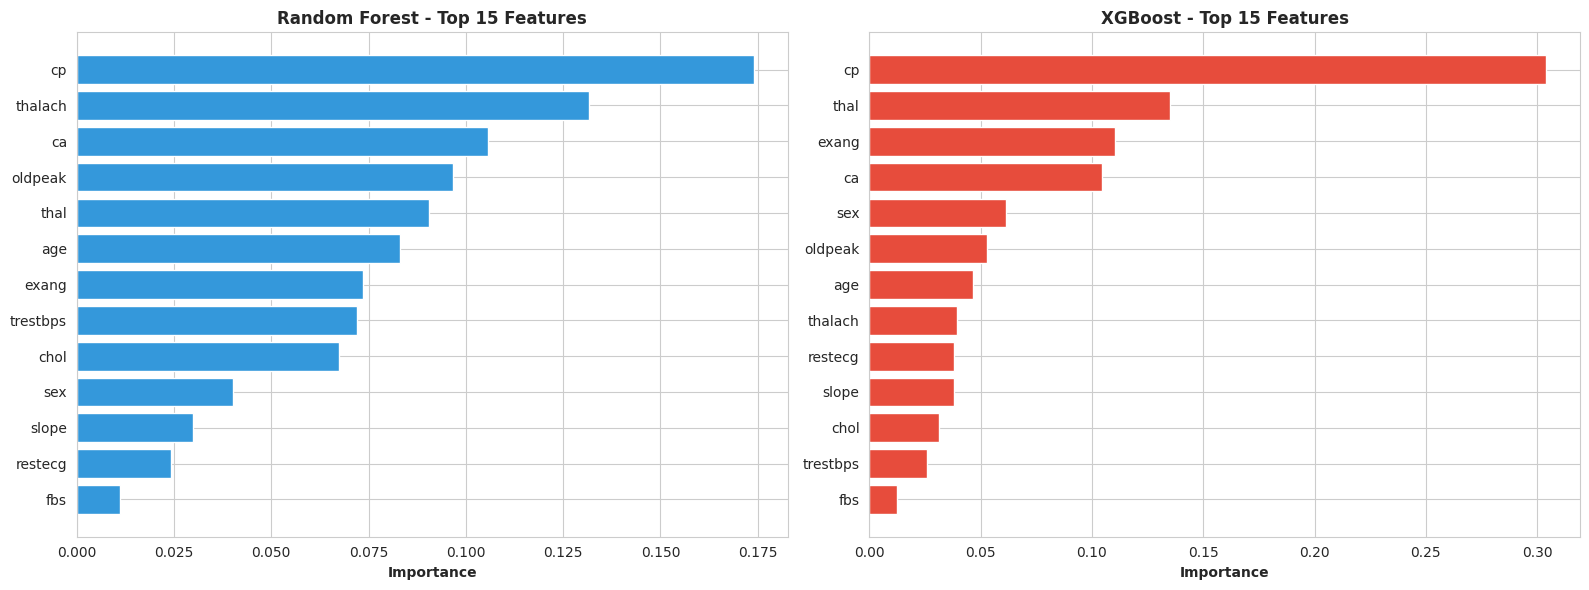

In [15]:
# Feature Importance for Random Forest and XGBoost
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_model = results['Random Forest']['model']
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

axes[0].barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='#3498db')
axes[0].set_xlabel('Importance', fontweight='bold')
axes[0].set_title('Random Forest - Top 15 Features', fontweight='bold', fontsize=12)
axes[0].invert_yaxis()

# XGBoost Feature Importance
xgb_model = results['XGBoost']['model']
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

axes[1].barh(feature_importance_xgb['Feature'], feature_importance_xgb['Importance'], color='#e74c3c')
axes[1].set_xlabel('Importance', fontweight='bold')
axes[1].set_title('XGBoost - Top 15 Features', fontweight='bold', fontsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()